<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.042876,63.787549,74.563365,221.393790,98.459086,122.934704
1,0.0,1.0,42.866604,78.838377,235.791401,367.496383,109.091756,258.404627
2,0.0,2.0,29.388968,67.285527,18.134007,124.808501,109.748284,15.060217
3,0.0,3.0,40.467703,49.928486,-76.967244,23.428944,103.195256,-79.766313
4,0.0,4.0,28.861667,97.588789,184.392654,320.843110,116.661032,204.182078
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.041345,62.402155,179.285017,294.728517,108.629507,186.099010
59996,999.0,56.0,52.385087,58.240880,-255.500595,-134.874628,108.706297,-243.580925
59997,999.0,57.0,48.968014,48.368390,-141.786373,-34.449969,101.107621,-135.557591
59998,999.0,58.0,97.485706,34.702035,155.778224,297.965965,106.782647,191.183318


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.042876,63.787549,74.563365,221.393790,98.459086,122.934704
1,0.0,1.0,42.866604,78.838377,235.791401,367.496383,109.091756,258.404627
2,0.0,2.0,29.388968,67.285527,18.134007,124.808501,109.748284,15.060217
3,0.0,3.0,40.467703,49.928486,-76.967244,23.428944,103.195256,-79.766313
4,0.0,4.0,28.861667,97.588789,184.392654,320.843110,116.661032,204.182078
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.041345,62.402155,179.285017,294.728517,108.629507,186.099010
59996,999.0,56.0,52.385087,58.240880,-255.500595,-134.874628,108.706297,-243.580925
59997,999.0,57.0,48.968014,48.368390,-141.786373,-34.449969,101.107621,-135.557591
59998,999.0,58.0,97.485706,34.702035,155.778224,297.965965,106.782647,191.183318


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.042876  63.787549   74.563365  221.393790   98.459086   
      1.0    42.866604  78.838377  235.791401  367.496383  109.091756   
      2.0    29.388968  67.285527   18.134007  124.808501  109.748284   
      3.0    40.467703  49.928486  -76.967244   23.428944  103.195256   
      4.0    28.861667  97.588789  184.392654  320.843110  116.661032   
...                ...        ...         ...         ...         ...   
999.0 55.0   43.041345  62.402155  179.285017  294.728517  108.629507   
      56.0   52.385087  58.240880 -255.500595 -134.874628  108.706297   
      57.0   48.968014  48.368390 -141.786373  -34.449969  101.107621   
      58.0   97.485706  34.702035  155.778224  297.965965  106.782647   
      59.0   86.220498  39.819351  -92.556004   43.483845  106.756712   

                  e_hat  
rep   index              
0.0   0.0    122.934704  
      1.0    258.404627  
      2.0     15.060217  
      3.0    -79.766313  
      4.0    204.182078  
...                 ...  
999.0 55.0   186.099010  
      56.0  -243.580925  
      57.0  -135.557591  
      58.0   191.183318  
      59.0   -63.272868  

[60000 rows x 6 columns]

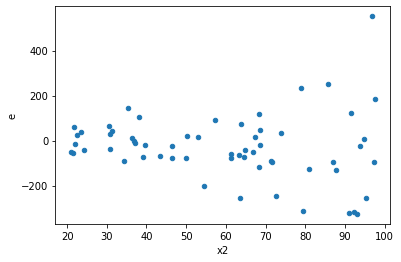

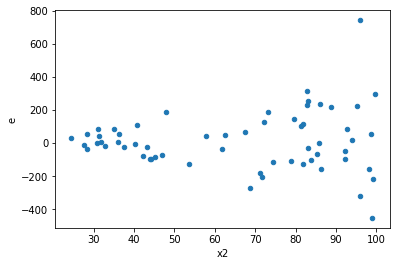

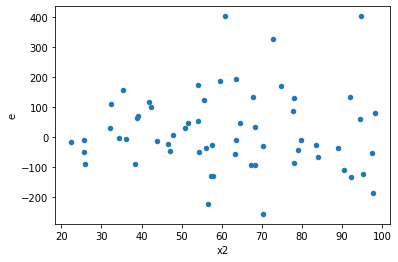

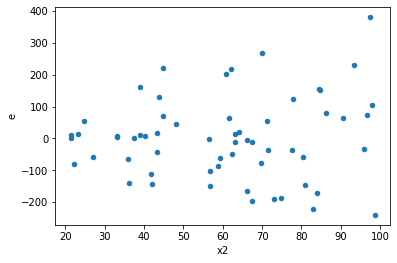

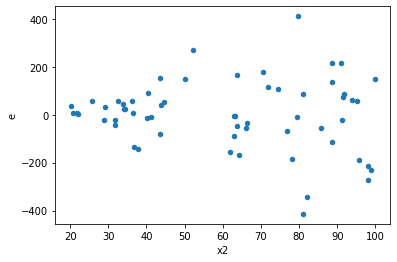

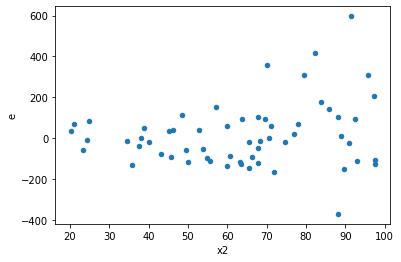

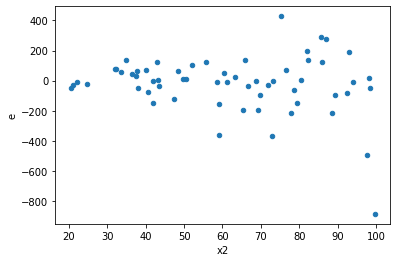

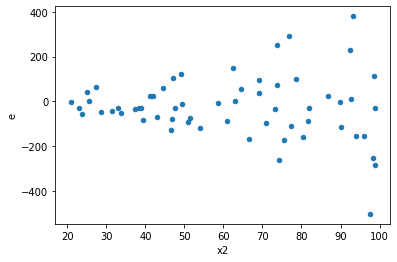

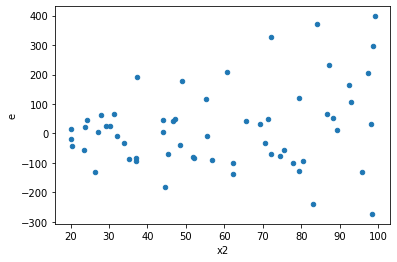

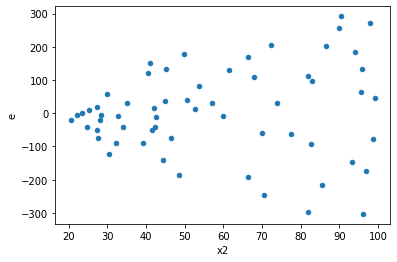

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,30.0,117262.71376306163,1034227.4096839147,4510.10437550237,34474.24698946383,7.643780302894613,4.2313703429996963e-07,0.9999997884314829,2.1156851714998481e-07,Reject001=0 : Heteroscedasticity
2.0,25.0,31.0,265207.1635696427,606219.4507673936,10608.286542785709,19555.46615378689,1.8434142097232296,0.10668619983052374,0.9466569000847381,0.05334309991526187,Reject001=1 : Homoscedasticity
3.0,27.0,29.0,360919.03725750785,573114.6491815106,13367.37175027807,19762.57410970726,1.4784188304852193,0.3038359304309104,0.8480820347845448,0.1519179652154552,Reject001=1 : Homoscedasticity
4.0,27.0,29.0,218342.4174825614,957113.1316621028,8086.75620305783,33003.901091796644,4.081228648801968,0.00034184616973265136,0.9998290769151337,0.00017092308486632568,Reject001=0 : Heteroscedasticity
5.0,30.0,26.0,603759.795324527,582955.5599000104,20125.326510817566,22421.367688461938,1.1140871516499484,0.7848010451904033,0.6075994774047984,0.39240052259520164,Reject001=1 : Homoscedasticity
6.0,25.0,31.0,530496.5664932212,1253133.3720723453,21219.86265972885,40423.65716362404,1.9049914606817997,0.0893633166099479,0.955318341695026,0.04468165830497395,Reject001=1 : Homoscedasticity
7.0,26.0,30.0,99934.63676032322,989631.9673005827,3843.639875397047,32987.73224335276,8.582420131112084,1.0853196097393436e-07,0.9999999457340195,5.426598048696718e-08,Reject001=0 : Heteroscedasticity
8.0,27.0,29.0,177514.7000198044,810143.0425443148,6574.618519252015,27935.966984286715,4.249062801512163,0.000235884432252087,0.999882057783874,0.0001179422161260435,Reject001=0 : Heteroscedasticity
11.0,34.0,22.0,191328.02417459924,727892.9254238124,5627.294828664683,33086.04206471874,5.879564350561995,5.210231242180896e-05,0.9999739488437891,2.605115621090448e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,30.0,117262.71376306163,1034227.4096839147,4510.10437550237,34474.24698946383,7.643780302894613,4.2313703429996963e-07,Reject001=0 : Heteroscedasticity
1.0,33.0,23.0,1684663.4985431097,119470.98708182243,51050.4090467609,5194.390742687931,0.10175022766085967,9.605492136440498e-09,Reject001=0 : Heteroscedasticity
2.0,25.0,31.0,265207.1635696427,606219.4507673936,10608.286542785709,19555.46615378689,1.8434142097232296,0.10668619983052374,Reject001=1 : Homoscedasticity
3.0,27.0,29.0,360919.03725750785,573114.6491815106,13367.37175027807,19762.57410970726,1.4784188304852193,0.3038359304309104,Reject001=1 : Homoscedasticity
4.0,27.0,29.0,218342.4174825614,957113.1316621028,8086.75620305783,33003.901091796644,4.081228648801968,0.00034184616973265136,Reject001=0 : Heteroscedasticity
5.0,30.0,26.0,603759.795324527,582955.5599000104,20125.326510817566,22421.367688461938,1.1140871516499484,0.7848010451904033,Reject001=1 : Homoscedasticity
6.0,25.0,31.0,530496.5664932212,1253133.3720723453,21219.86265972885,40423.65716362404,1.9049914606817997,0.0893633166099479,Reject001=1 : Homoscedasticity
7.0,26.0,30.0,99934.63676032322,989631.9673005827,3843.639875397047,32987.73224335276,8.582420131112084,1.0853196097393436e-07,Reject001=0 : Heteroscedasticity
8.0,27.0,29.0,177514.7000198044,810143.0425443148,6574.618519252015,27935.966984286715,4.249062801512163,0.000235884432252087,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    525
Reject001=1 : Homoscedasticity      475
Name: Result_test, dtype: int64